In [1]:
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv('2018_gem_cm_I10I9.txt.gz', sep='\s+', dtype=str, names=['source', 'target', 'meta'])
df.head()

,source,target,meta
0,A000,0010,00000
1,A001,0011,00000
2,A009,0019,00000
3,A0100,0020,10000
4,A0101,0020,10000


In [6]:
def analyze_conversions(filename):
    df = pd.read_csv(filename, sep='\s+', dtype=str, names=['source', 'target', 'meta'])
    df['approximate'] = df['meta'].apply(lambda s: s[0])
    df['no_map'] = df['meta'].apply(lambda s: s[1])
    df['combination'] = df['meta'].apply(lambda s: s[2])
    df['scenario'] = df['meta'].apply(lambda s: s[3])
    df['choice_list'] = df['meta'].apply(lambda s: s[4])
    
    
    codes = list(df['source'][df['no_map'] == '1'])
    status = ['no_map' for _ in codes]
    for code, source_df in df[df['no_map'] =='0'].groupby('source'):
        codes.append(code)
        if len(source_df) == 1:
            status.append('11_map')
        elif len(set(source_df['scenario'])) > 1:
            status.append('ambigious')
        elif len(set(source_df['choice_list'])) < len(source_df):
            status.append('1n_map(resolved)')
        else:
            status.append('1n_map')


    status = pd.DataFrame({'code': codes, 'status': status})
    print(status.value_counts('status'))
    sns.countplot(x=status['status'], color='gray')

    

status
11_map              63111
1n_map               3851
1n_map(resolved)     3762
no_map                731
ambigious             249
dtype: int64


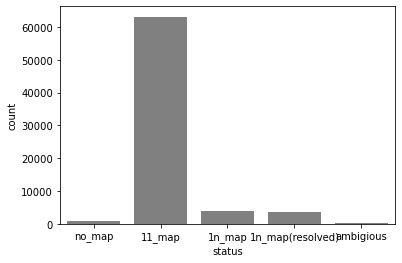

In [7]:
analyze_conversions('2018_gem_cm_I10I9.txt.gz')

status
11_map              10765
1n_map(resolved)     3009
no_map                422
1n_map                305
ambigious              66
dtype: int64


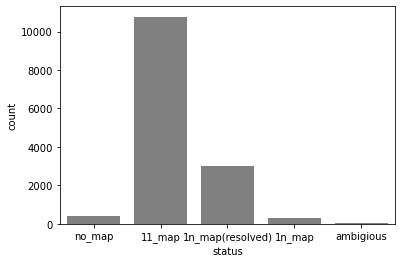

In [9]:
analyze_conversions('2018_gem_cm_I9I10.txt.gz')